In [3]:
import pandas as pd
df1=pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\innings_deliveries.csv")
df1



,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]


## 1.	Clean the dataset(don't drop any values as it will affect the dataset)

In [7]:
import pandas as pd
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\innings_deliveries.csv")
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
df['player_out'] = df['player_out'].fillna("Not Out")
df['wicket_kind'] = df['wicket_kind'].fillna("None")
def convert_list(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

df['fielders'] = df['fielders'].apply(convert_list)
df1


,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]


## 2.	Write a program to plot the visualizing the run distribution per over for both teams to illustrate the scoring trends throughout the innings(use lineplot from seaborn)

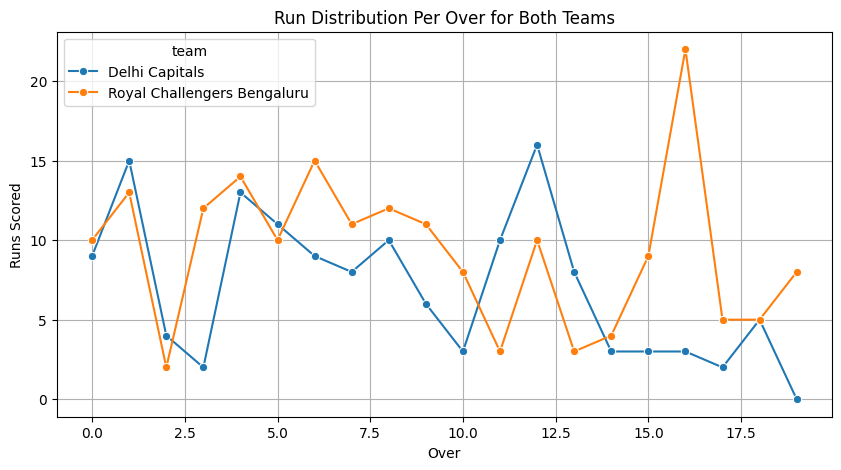

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
runs_per_over = df.groupby(["team", "over"])["runs_total"].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=runs_per_over, x="over", y="runs_total", hue="team", marker="o")
plt.title("Run Distribution Per Over for Both Teams")
plt.xlabel("Over")
plt.ylabel("Runs Scored")
plt.grid(True)
plt.show()


## 3.	create a bar chart to visualize the top contributors in terms of runs

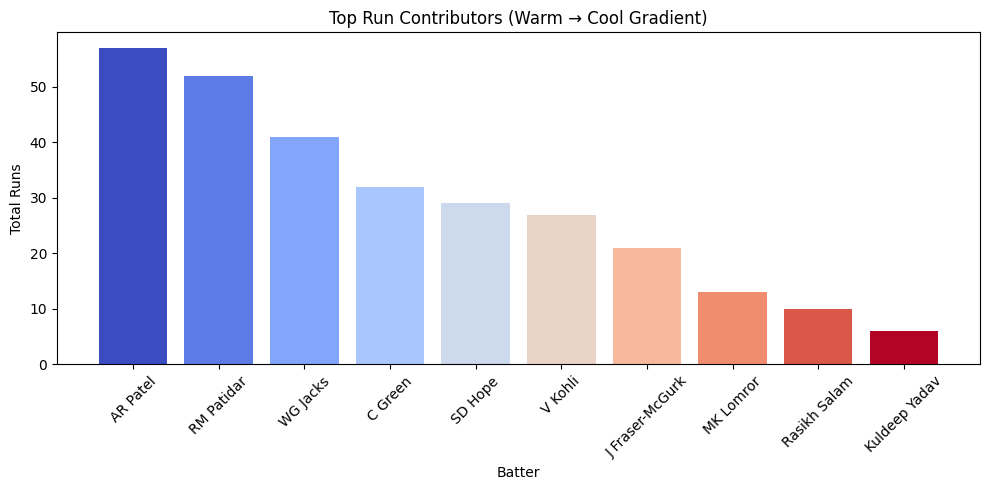

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("innings_deliveries.csv")
top_contributors = df.groupby("batter")["runs_batter"].sum().sort_values(ascending=False).head(10)
colors = plt.cm.coolwarm(np.linspace(0, 1, len(top_contributors)))
plt.figure(figsize=(10,5))
plt.bar(top_contributors.index, top_contributors.values, color=colors)
plt.xlabel("Batter")
plt.ylabel("Total Runs")
plt.title("Top Run Contributors (Warm → Cool Gradient)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 4.	Create a chart to visualize the combined bar and line plot provides a comprehensive overview of the bowling performance of each team.(Wickets and Economy Rate)

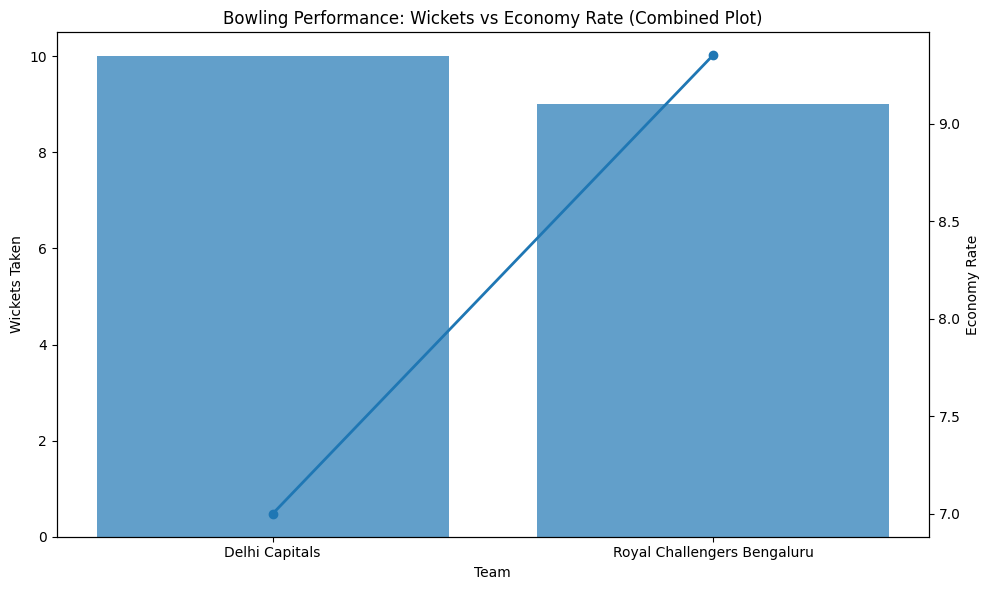

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("innings_deliveries.csv")
wickets = df[df['player_out'] != "Not Out"].groupby("team")["player_out"].count()
runs_conceded = df.groupby("team")["runs_total"].sum()
overs_bowled = df.groupby("team")["over"].max() + 1

economy_rate = runs_conceded / overs_bowled
bowling_stats = pd.DataFrame({
    "Wickets": wickets,
    "Economy Rate": economy_rate
})
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.bar(bowling_stats.index, bowling_stats["Wickets"], label="Wickets", alpha=0.7)
ax1.set_ylabel("Wickets Taken")
ax1.set_xlabel("Team")
ax2 = ax1.twinx()
ax2.plot(bowling_stats.index, bowling_stats["Economy Rate"], marker="o", linewidth=2, label="Economy Rate")
ax2.set_ylabel("Economy Rate")
plt.title("Bowling Performance: Wickets vs Economy Rate (Combined Plot)")
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


## 5.	Create a pie chart to visualize the  types of dismissals that occurred during the match to understand how most wickets were taken (e.g., caught, bowled, run out).

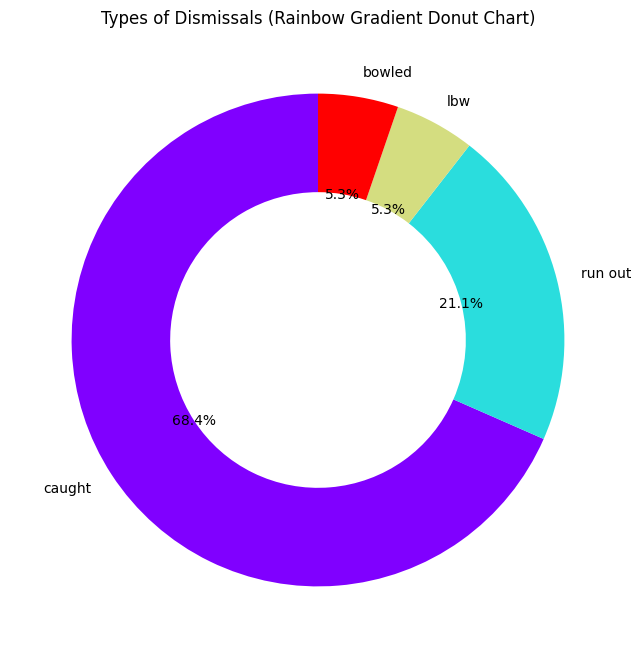

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("innings_deliveries.csv")
dismissals = df[df["wicket_kind"] != "None"]
dismissal_counts = dismissals["wicket_kind"].value_counts()
colors = plt.cm.rainbow(np.linspace(0, 1, len(dismissal_counts)))

plt.figure(figsize=(8,8))
plt.pie(
    dismissal_counts,
    labels=dismissal_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4}  
)

plt.title("Types of Dismissals (Rainbow Gradient Donut Chart)")
plt.show()


## 6) 	Perform Partnerships Analysis by calculating and visualizing the most productive batting partnerships in the match

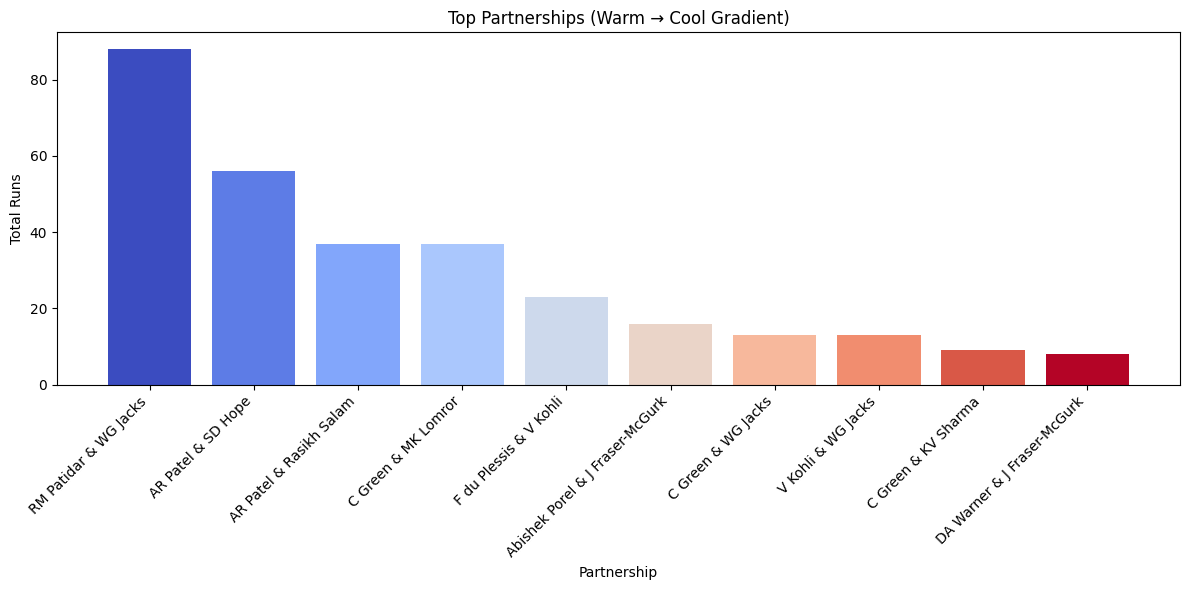

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("innings_deliveries.csv")
df['partnership'] = df.apply(
    lambda x: " & ".join(sorted([x['batter'], x['non_striker']])),
    axis=1
)
partnership_runs = df.groupby("partnership")["runs_total"].sum().sort_values(ascending=False).head(10)

colors = plt.cm.coolwarm(np.linspace(0, 1, len(partnership_runs)))
plt.figure(figsize=(12,6))
plt.bar(partnership_runs.index, partnership_runs.values, color=colors)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Partnership")
plt.ylabel("Total Runs")
plt.title("Top Partnerships (Warm → Cool Gradient)")
plt.tight_layout()
plt.show()


## 7) Perform a Phase Analysis to examine how teams performed during different stages of their innings; Powerplay (first 6 overs), Middle overs (7-15), and Death overs (16-20).(look at scoring rates and wicket loss during these phases. This can offer insights into the team’s tactical approach and execution under varying conditions)

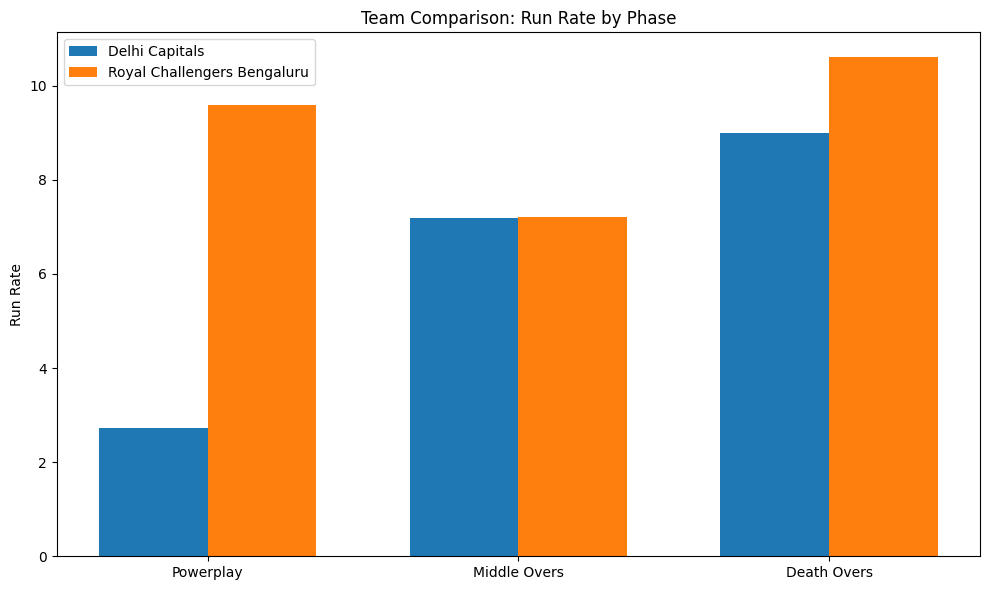

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("innings_deliveries.csv")
def get_phase(over):
    if over <= 6:
        return "Powerplay"
    elif 7 <= over <= 15:
        return "Middle Overs"
    else:
        return "Death Overs"
df["phase"] = df["over"].apply(get_phase)
phase_summary = df.groupby(["team", "phase"]).agg(
    runs=("runs_total", "sum"),
    balls=("runs_total", "count"),
    wickets=("player_out", lambda x: (x != "Not Out").sum())
).reset_index()

phase_summary["overs"] = phase_summary["balls"] / 6
phase_summary["run_rate"] = phase_summary["runs"] / phase_summary["overs"]

phases = ["Powerplay", "Middle Overs", "Death Overs"]
teams = phase_summary["team"].unique()

x = np.arange(len(phases))
width = 0.35

plt.figure(figsize=(10,6))

for i, team in enumerate(teams):
    team_rr = phase_summary[phase_summary["team"] == team]["run_rate"]
    plt.bar(x + i*width, team_rr, width, label=team)

plt.xticks(x + width/2, phases)
plt.ylabel("Run Rate")
plt.title("Team Comparison: Run Rate by Phase")
plt.legend()
plt.tight_layout()
plt.show()


## 8) Write a program to calculate the strike rate for each batter and print the top 10 batters.

In [5]:
import pandas as pd
df = pd.read_csv("innings_deliveries.csv")
balls = df.groupby("batter")["runs_batter"].count()
runs = df.groupby("batter")["runs_batter"].sum()
strike_rate_df = pd.DataFrame({
    "Runs": runs,
    "Balls Faced": balls
})
strike_rate_df["Strike Rate"] = (strike_rate_df["Runs"] / strike_rate_df["Balls Faced"]) * 100
top10 = strike_rate_df.sort_values(by="Strike Rate", ascending=False).head(10)

print(top10)


                 Runs  Balls Faced  Strike Rate
batter                                         
J Fraser-McGurk    21            8   262.500000
V Kohli            27           14   192.857143
RM Patidar         52           34   152.941176
KV Sharma           6            4   150.000000
AR Patel           57           40   142.500000
WG Jacks           41           30   136.666667
C Green            32           24   133.333333
MK Lomror          13           10   130.000000
SD Hope            29           24   120.833333
F du Plessis        6            7    85.714286


## 9)Plot a graph to show the strike rate across different phases for top performers

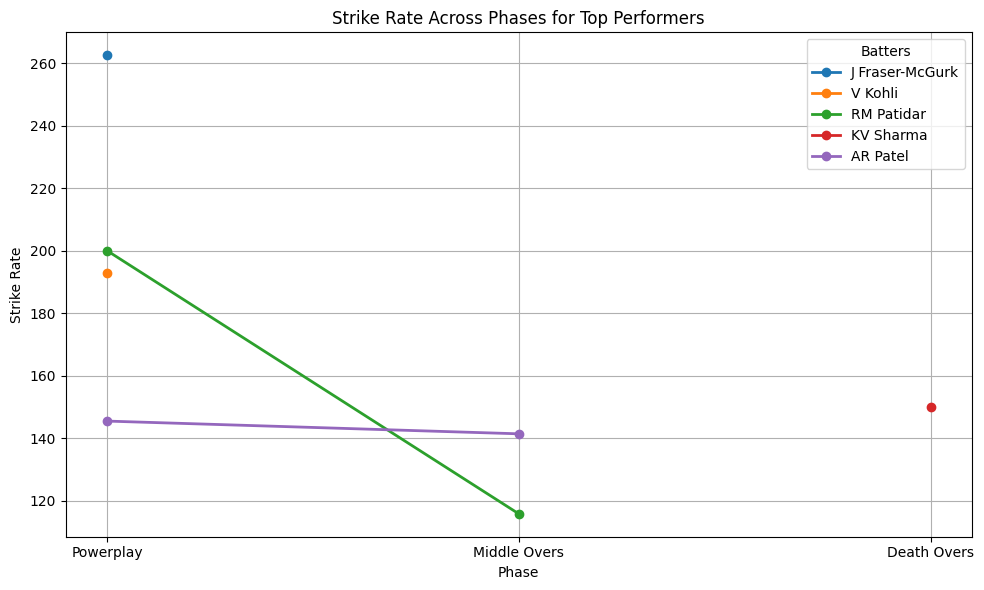

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("innings_deliveries.csv")
def get_phase(over):
    if over <= 6:
        return "Powerplay"
    elif 7 <= over <= 15:
        return "Middle Overs"
    else:
        return "Death Overs"

df["phase"] = df["over"].apply(get_phase)
overall_balls = df.groupby("batter")["runs_batter"].count()
overall_runs = df.groupby("batter")["runs_batter"].sum()
overall_sr = (overall_runs / overall_balls) * 100
top_batters = overall_sr.sort_values(ascending=False).head(5).index
phase_stats = df[df["batter"].isin(top_batters)].groupby(["batter", "phase"]).agg(
    runs=("runs_batter", "sum"),
    balls=("runs_batter", "count")
).reset_index()

phase_stats["strike_rate"] = (phase_stats["runs"] / phase_stats["balls"]) * 100
plt.figure(figsize=(10,6))

for batter in top_batters:
    batter_data = phase_stats[phase_stats["batter"] == batter]
    plt.plot(batter_data["phase"], batter_data["strike_rate"], marker="o", linewidth=2, label=batter)

plt.xlabel("Phase")
plt.ylabel("Strike Rate")
plt.title("Strike Rate Across Phases for Top Performers")
plt.legend(title="Batters")
plt.grid(True)
plt.tight_layout()
plt.show()


## 10)Plot a graph to show the Cumulative Runs with Wickets for RCB and DC

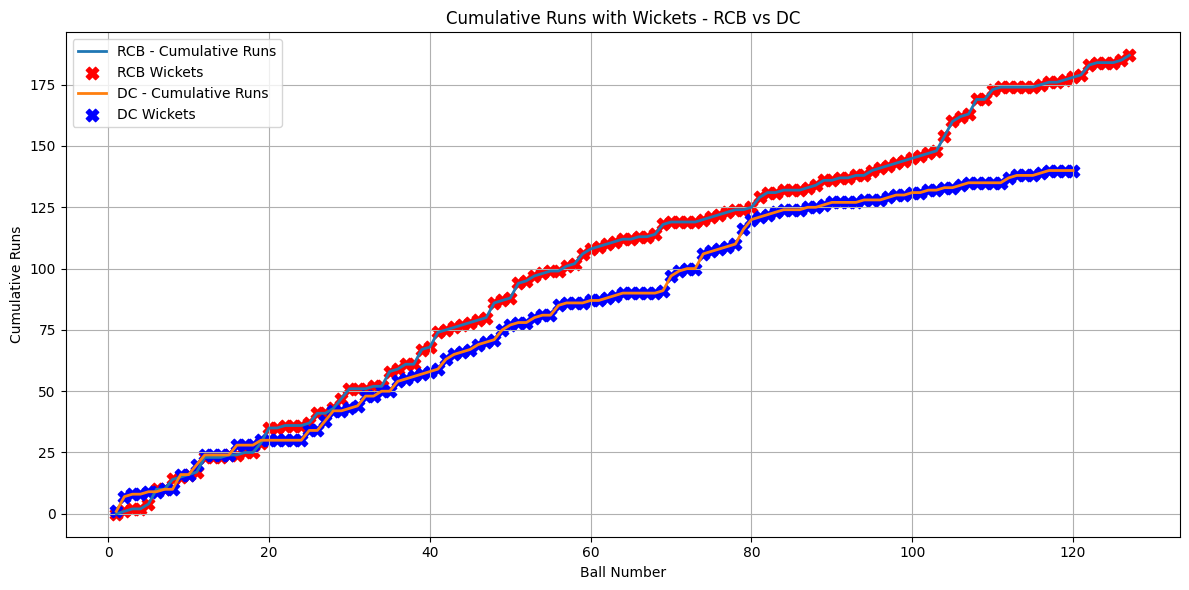

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("innings_deliveries.csv")
def team_cumulative_data(team_name):
    team_df = df[df["team"] == team_name].copy()
    team_df["cumulative_runs"] = team_df["runs_total"].cumsum()
    team_df["ball_number"] = range(1, len(team_df) + 1)
    team_df["is_wicket"] = team_df["player_out"] != "Not Out"
    return team_df

rcb = team_cumulative_data("Royal Challengers Bengaluru") if "Royal Challengers Bengaluru" in df["team"].unique() else team_cumulative_data("RCB")
dc  = team_cumulative_data("Delhi Capitals") if "Delhi Capitals" in df["team"].unique() else team_cumulative_data("DC")
plt.figure(figsize=(12,6))

plt.plot(rcb["ball_number"], rcb["cumulative_runs"], label="RCB - Cumulative Runs", linewidth=2)
plt.scatter(
    rcb.loc[rcb["is_wicket"], "ball_number"],
    rcb.loc[rcb["is_wicket"], "cumulative_runs"],
    color="red",
    marker="X",
    s=80,
    label="RCB Wickets"
)
plt.plot(dc["ball_number"], dc["cumulative_runs"], label="DC - Cumulative Runs", linewidth=2)
plt.scatter(
    dc.loc[dc["is_wicket"], "ball_number"],
    dc.loc[dc["is_wicket"], "cumulative_runs"],
    color="blue",
    marker="X",
    s=80,
    label="DC Wickets"
)

plt.xlabel("Ball Number")
plt.ylabel("Cumulative Runs")
plt.title("Cumulative Runs with Wickets - RCB vs DC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
